In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns
import tensorflow as tf

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')
# Run all commands
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression

In [20]:
df = pd.read_csv("american_bankruptcy.csv")
df.describe()
df.head()
df.info()
print("Duplicates:", df.duplicated().sum())
print("NULLS:", df.isnull().sum().sum())
print("NAs:", df.isna().sum().sum())

,year,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
count,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,7.868200e+04,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000,78682.000000
mean,2007.506317,880.362485,1594.529029,121.234256,376.759424,201.605717,129.382453,286.832743,3.414355e+03,2364.019706,2867.110620,722.483710,255.525035,769.490783,610.072255,532.467069,2364.019706,1773.563963,1987.260307
std,5.742768,3928.564794,8930.484664,652.376804,2012.023142,1060.766096,1265.532022,1335.978571,1.841410e+04,11950.068842,12917.944421,3242.170946,1494.643534,3774.703114,2938.387443,6369.159440,11950.068842,8053.684902,10419.629038
min,1999.000000,-7.760000,-366.645000,0.000000,-21913.000000,0.000000,-98696.000000,-0.006000,1.000000e-04,-1964.999000,0.001000,-0.023000,-25913.000000,-21536.000000,0.001000,-102362.000000,-1964.999000,0.001000,-317.197000
25%,2002.000000,18.924000,17.038250,1.192000,-0.811000,0.000000,-7.415750,3.281250,3.498000e+01,27.548500,37.363500,0.000000,-2.787000,8.521250,8.889250,-68.282750,27.548500,13.486000,32.872500
50%,2007.000000,100.449500,103.661000,7.929500,15.034500,7.023000,1.616000,22.820000,2.275118e+02,186.598500,213.203500,7.593500,6.518000,63.581500,43.333000,-1.131000,186.598500,81.988000,168.912000
75%,2012.000000,431.526750,634.548000,47.971750,139.655250,74.747250,40.144250,131.580500,1.244890e+03,1046.402500,1171.364750,248.760750,87.599000,344.074250,222.817000,146.070000,1046.402500,629.975000,875.522250
max,2018.000000,169662.000000,374623.000000,28430.000000,81730.000000,62567.000000,104821.000000,65812.000000,1.073391e+06,511729.000000,531864.000000,166250.000000,71230.000000,137106.000000,116866.000000,402089.000000,511729.000000,337980.000000,481580.000000


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  78682 non-null  object 
 1   status_label  78682 non-null  object 
 2   year          78682 non-null  int64  
 3   X1            78682 non-null  float64
 4   X2            78682 non-null  float64
 5   X3            78682 non-null  float64
 6   X4            78682 non-null  float64
 7   X5            78682 non-null  float64
 8   X6            78682 non-null  float64
 9   X7            78682 non-null  float64
 10  X8            78682 non-null  float64
 11  X9            78682 non-null  float64
 12  X10           78682 non-null  float64
 13  X11           78682 non-null  float64
 14  X12           78682 non-null  float64
 15  X13           78682 non-null  float64
 16  X14           78682 non-null  float64
 17  X15           78682 non-null  float64
 18  X16           78682 non-nu

In [21]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values

    return summ

summary(df)

data shape: (78682, 21)


,data type,#missing,min,max
company_name,object,0,NaN,NaN
status_label,object,0,NaN,NaN
year,int64,0,1999.0,2018.0
X1,float64,0,-7.76,169662.0
X2,float64,0,-366.645,374623.0
X3,float64,0,0.0,28430.0
X4,float64,0,-21913.0,81730.0
X5,float64,0,0.0,62567.0
X6,float64,0,-98696.0,104821.0
X7,float64,0,-0.006,65812.0


In [22]:
df["X9"].equals(df["X16"])

True

In [23]:
df = df.drop('X16', axis=1)

In [24]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print(df['status_label'].value_counts())
print("Alive Ratio:", alive_ratio) #93%
print("Failed Ratio:", failed_ratio) #6%

status_label
alive     73462
failed     5220
Name: count, dtype: int64
Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


<Figure size 1200x800 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X1'),
  Text(1, 0, 'X2'),
  Text(2, 0, 'X3'),
  Text(3, 0, 'X4'),
  Text(4, 0, 'X5'),
  Text(5, 0, 'X6'),
  Text(6, 0, 'X7'),
  Text(7, 0, 'X8'),
  Text(8, 0, 'X9'),
  Text(9, 0, 'X10'),
  Text(10, 0, 'X11'),
  Text(11, 0, 'X12'),
  Text(12, 0, 'X13'),
  Text(13, 0, 'X14'),
  Text(14, 0, 'X15'),
  Text(15, 0, 'X17'),
  Text(16, 0, 'X18')])

Text(0.5, 1.0, 'Box Plot of Numerical Features with Outliers')

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Values')

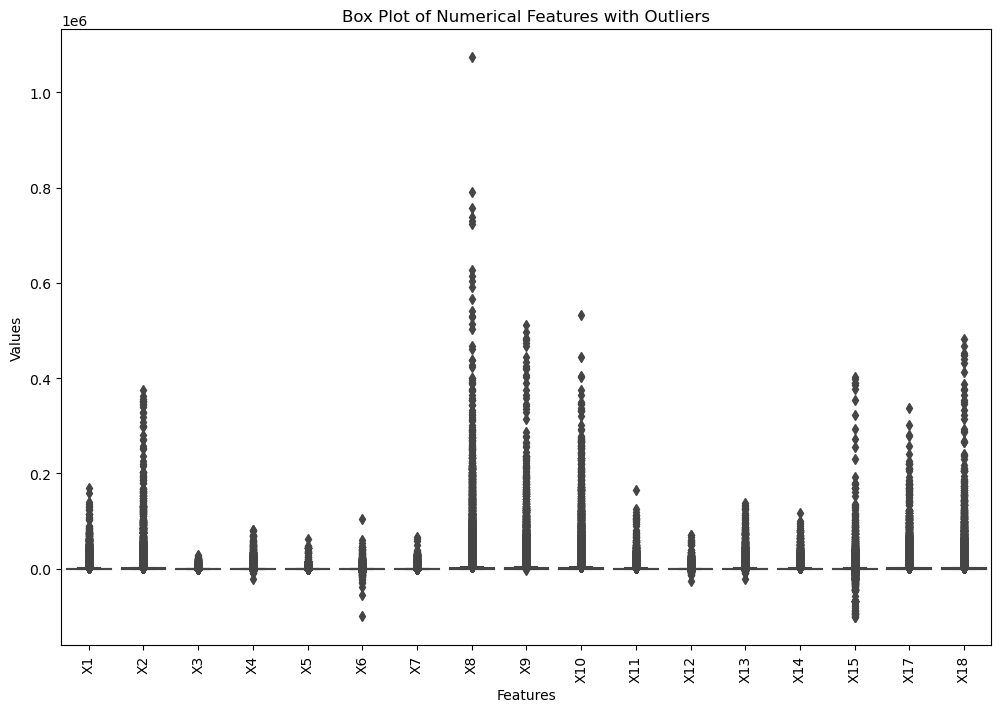

In [25]:
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']] < (Q1 - 1.5 * IQR)) | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Matrix')

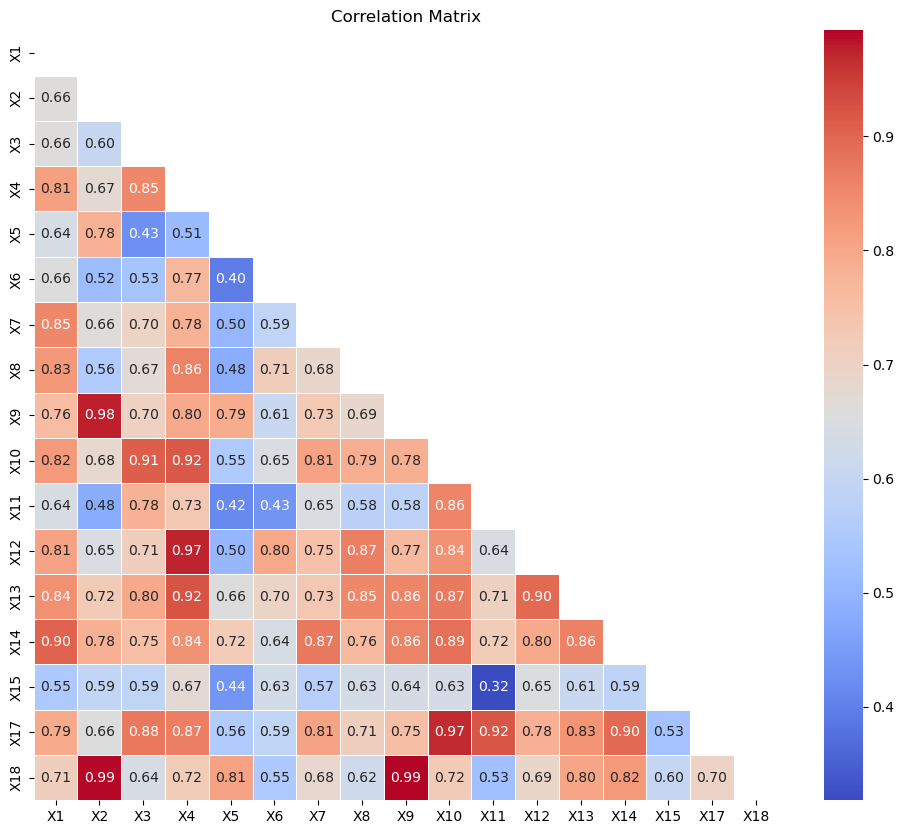

In [26]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

17

<Axes: >

Text(0.5, 1.0, 'X1')

[]

<Axes: >

Text(0.5, 1.0, 'X2')

[]

<Axes: >

Text(0.5, 1.0, 'X3')

[]

<Axes: >

Text(0.5, 1.0, 'X4')

[]

<Axes: >

Text(0.5, 1.0, 'X5')

[]

<Axes: >

Text(0.5, 1.0, 'X6')

[]

<Axes: >

Text(0.5, 1.0, 'X7')

[]

<Axes: >

Text(0.5, 1.0, 'X8')

[]

<Axes: >

Text(0.5, 1.0, 'X9')

[]

<Axes: >

Text(0.5, 1.0, 'X10')

[]

<Axes: >

Text(0.5, 1.0, 'X11')

[]

<Axes: >

Text(0.5, 1.0, 'X12')

[]

<Axes: >

Text(0.5, 1.0, 'X13')

[]

<Axes: >

Text(0.5, 1.0, 'X14')

[]

<Axes: >

Text(0.5, 1.0, 'X15')

[]

<Axes: >

Text(0.5, 1.0, 'X17')

[]

<Axes: >

Text(0.5, 1.0, 'X18')

[]

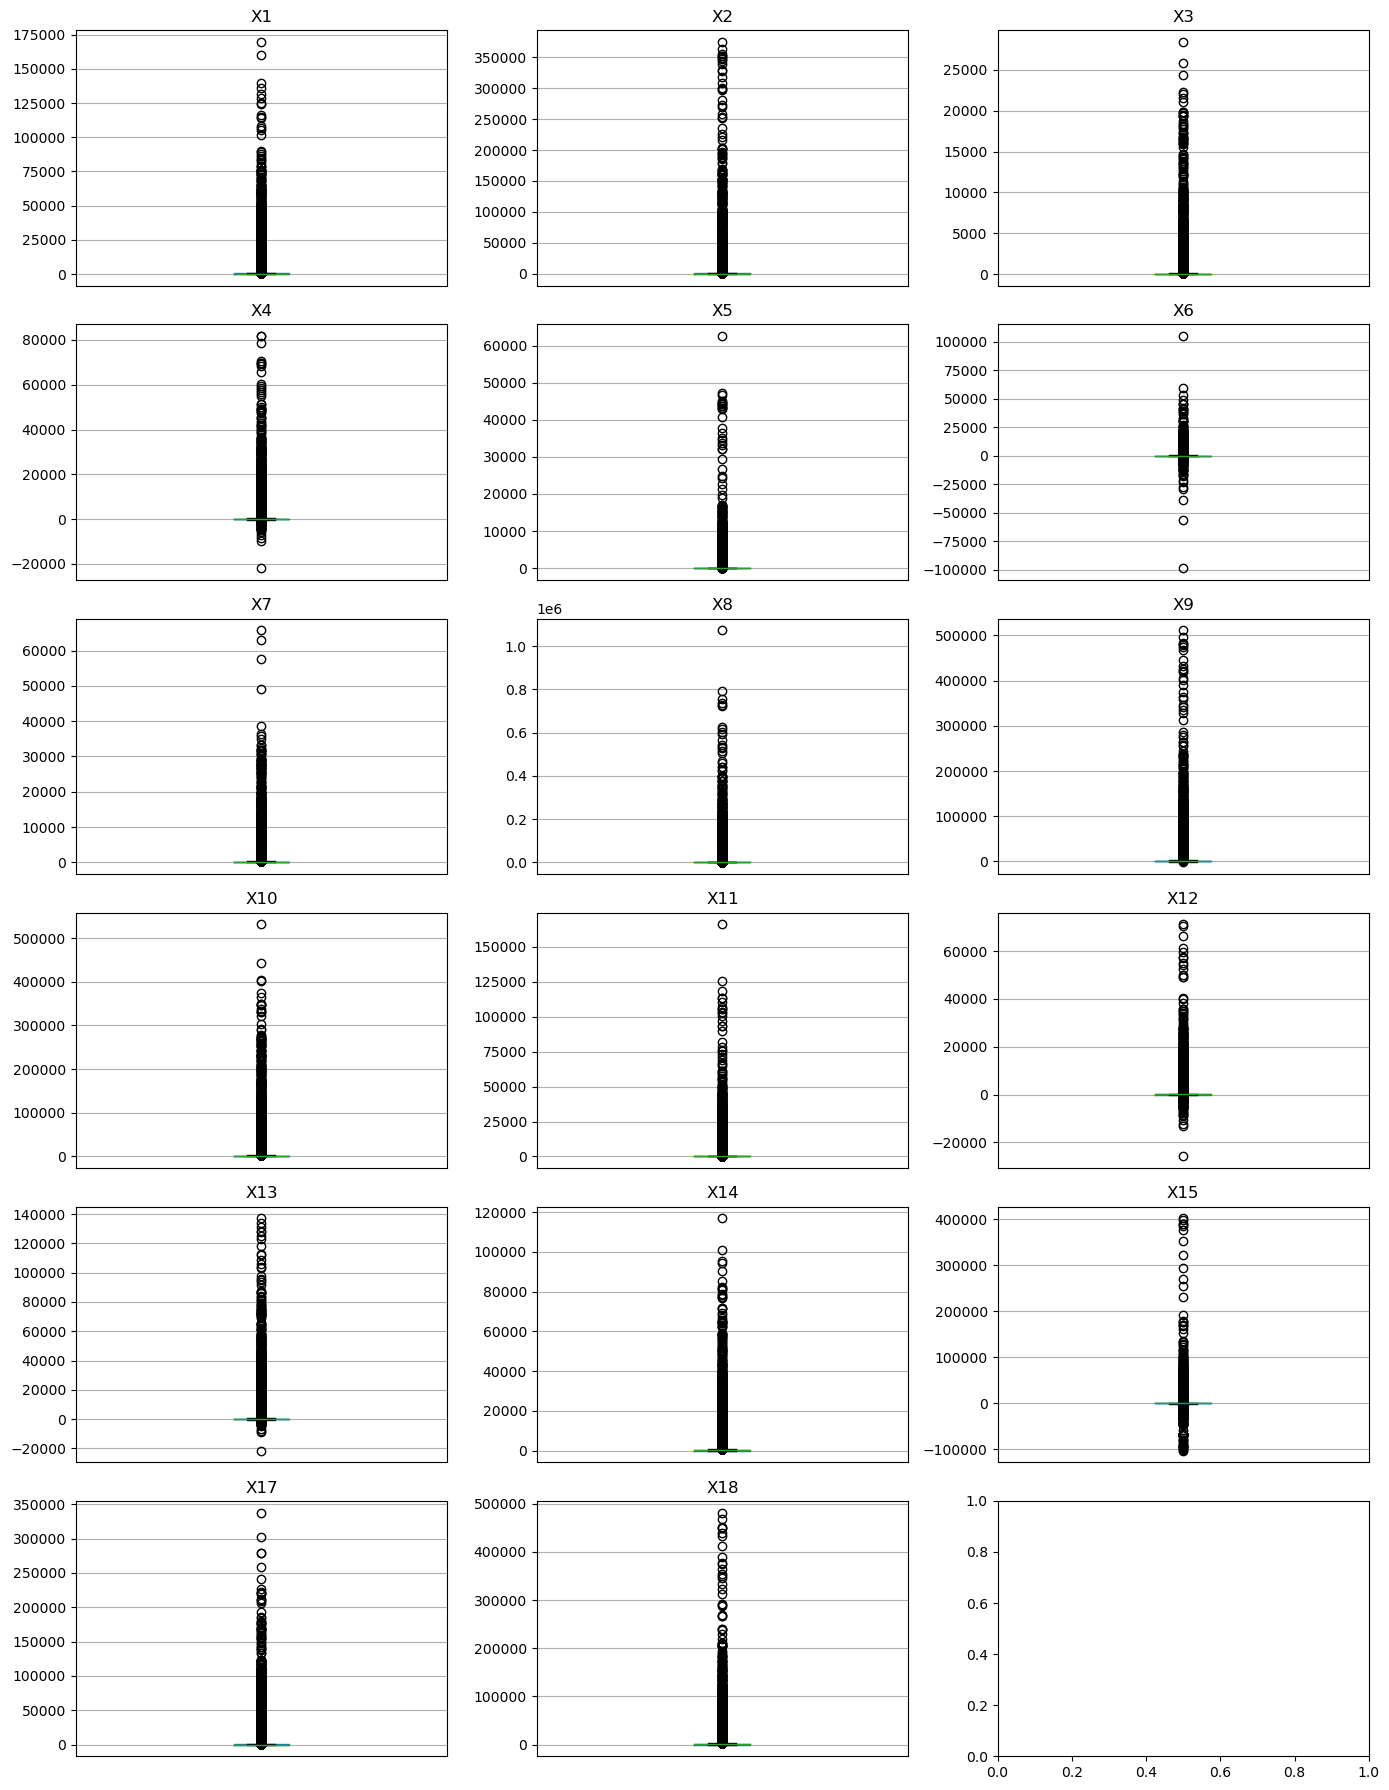

In [27]:
columns = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X17','X18']
df_out = df[columns]
len(columns)
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(14, 18))

for i, col in enumerate(columns):
    fila = i // 3
    columna = i % 3
    df_out.boxplot(column=col, ax=axes[fila, columna])
    axes[fila, columna].set_title(col)
    axes[fila, columna].set_xticks([])

plt.tight_layout()
plt.show()

# Train, Test + Validation Combined

## No Balancing

In [73]:
df_train = df[df["year"] <= 2011]
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year"])

df_val_test = df[(df["year"] >= 2012)]
y_test = df_val_test["status_label"]
X_test = df_val_test.drop(columns = ["company_name", "status_label", "year"])

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

num_features = X_train.shape[1]
rsf_size = max(1, num_features // 3)

print(rsf_size)

rf_grid = RandomForestClassifier(random_state=99,max_features=rsf_size)
gr_space = {
    'n_estimators': [500]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train, y_train)

5
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................n_estimators=500;, score=0.920 total time= 1.3min
[CV 2/3] END ..................n_estimators=500;, score=0.919 total time= 1.3min
[CV 3/3] END ..................n_estimators=500;, score=0.919 total time= 1.3min


Accuracy on train set: 1.0
Accuracy on test set: 0.9663370687760932

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.97      1.00      0.98     21977
      failed       0.62      0.04      0.08       778

    accuracy                           0.97     22755
   macro avg       0.79      0.52      0.53     22755
weighted avg       0.96      0.97      0.95     22755



<Axes: >

<Axes: >

Precision: 0.9671
Recall: 0.9991
False Positives (FP): 20
False Negatives (FN): 746


<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X15'),
  Text(1, 0, 'X8'),
  Text(2, 0, 'X3'),
  Text(3, 0, 'X7'),
  Text(4, 0, 'X1'),
  Text(5, 0, 'X13'),
  Text(6, 0, 'X10'),
  Text(7, 0, 'X17'),
  Text(8, 0, 'X5'),
  Text(9, 0, 'X11'),
  Text(10, 0, 'X14'),
  Text(11, 0, 'X6'),
  Text(12, 0, 'X2'),
  Text(13, 0, 'X18'),
  Text(14, 0, 'X4'),
  Text(15, 0, 'X9'),
  Text(16, 0, 'X12')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

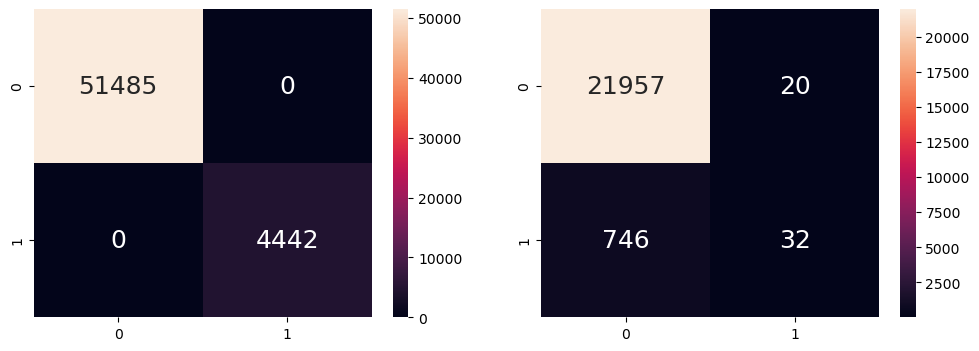

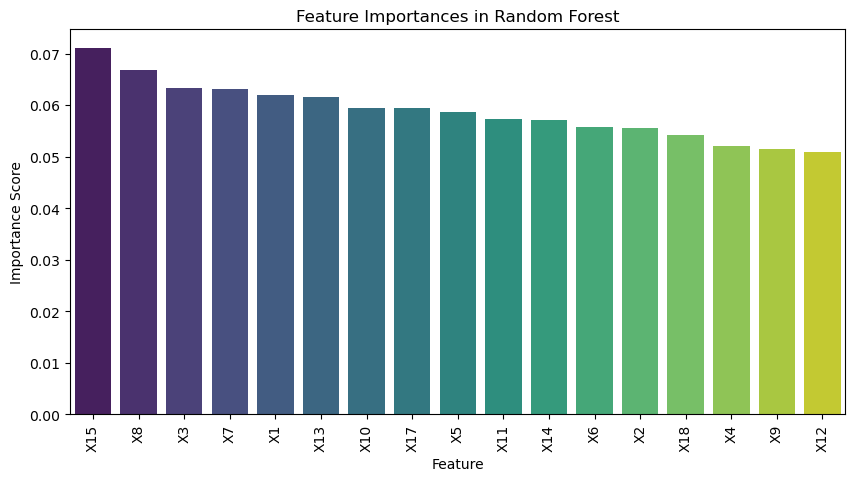

In [76]:
# Predict labels for train set
y_train_pred = model_grid.predict(X_train)

# Predict labels for test set
y_test_pred = model_grid.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label="alive")
recall = recall_score(y_test, y_test_pred, pos_label="alive")

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred, labels=["alive", "failed"]).ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Plot Feature Importances
feature_importances = model_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_resampled.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

# Train, Test+Validation Combined - SMOTE

## With SMOTE

In [28]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

df_train = df[df["year"] <= 2011]
y_train = df_train["status_label"]
X_train = df_train.drop(columns = ["company_name", "status_label", "year"])

df_val_test = df[(df["year"] >= 2012)]
y_test = df_val_test["status_label"]
X_test = df_val_test.drop(columns = ["company_name", "status_label", "year"])

# Apply SMOTE only to training data
smote = SMOTE(random_state=99)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

<class 'pandas.core.frame.DataFrame'>
Index: 22755 entries, 13 to 78681
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      22755 non-null  float64
 1   X2      22755 non-null  float64
 2   X3      22755 non-null  float64
 3   X4      22755 non-null  float64
 4   X5      22755 non-null  float64
 5   X6      22755 non-null  float64
 6   X7      22755 non-null  float64
 7   X8      22755 non-null  float64
 8   X9      22755 non-null  float64
 9   X10     22755 non-null  float64
 10  X11     22755 non-null  float64
 11  X12     22755 non-null  float64
 12  X13     22755 non-null  float64
 13  X14     22755 non-null  float64
 14  X15     22755 non-null  float64
 15  X17     22755 non-null  float64
 16  X18     22755 non-null  float64
dtypes: float64(17)
memory usage: 3.1 MB
<class 'pandas.core.series.Series'>
Index: 22755 entries, 13 to 78681
Series name: status_label
Non-Null Count  Dtype 
--------------  ----- 
22755 non

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22755 entries, 13 to 78681
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      22755 non-null  float64
 1   X2      22755 non-null  float64
 2   X3      22755 non-null  float64
 3   X4      22755 non-null  float64
 4   X5      22755 non-null  float64
 5   X6      22755 non-null  float64
 6   X7      22755 non-null  float64
 7   X8      22755 non-null  float64
 8   X9      22755 non-null  float64
 9   X10     22755 non-null  float64
 10  X11     22755 non-null  float64
 11  X12     22755 non-null  float64
 12  X13     22755 non-null  float64
 13  X14     22755 non-null  float64
 14  X15     22755 non-null  float64
 15  X17     22755 non-null  float64
 16  X18     22755 non-null  float64
dtypes: float64(17)
memory usage: 3.1 MB


In [37]:
y_test
live_count = np.count_nonzero(y_test == 'alive')
failed_count = np.count_nonzero(y_test == 'failed')
print(f"Alive: {alive_count}")
print(f"Failed: {failed_count}")

13       alive
14       alive
15       alive
16       alive
17       alive
         ...  
78677    alive
78678    alive
78679    alive
78680    alive
78681    alive
Name: status_label, Length: 22755, dtype: object

Alive: 73462
Failed: 778


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

num_features = X_train.shape[1]
rsf_size = max(1, num_features // 3)

print(rsf_size)

rf_grid = RandomForestClassifier(random_state=99,max_features=rsf_size)
gr_space = {
    'n_estimators': [500]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_resampled, y_train_resampled)

5
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................n_estimators=500;, score=0.907 total time= 2.5min
[CV 2/3] END ..................n_estimators=500;, score=0.920 total time= 2.4min
[CV 3/3] END ..................n_estimators=500;, score=0.907 total time= 2.6min


Accuracy on train set: 1.0
Accuracy on test set: 0.9205449351790815

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.98      0.94      0.96     21977
      failed       0.17      0.33      0.22       778

    accuracy                           0.92     22755
   macro avg       0.57      0.64      0.59     22755
weighted avg       0.95      0.92      0.93     22755



<Axes: >

<Axes: >

Precision: 0.9755
Recall: 0.9414
False Positives (FP): 1288
False Negatives (FN): 520


<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X11'),
  Text(1, 0, 'X15'),
  Text(2, 0, 'X5'),
  Text(3, 0, 'X8'),
  Text(4, 0, 'X7'),
  Text(5, 0, 'X2'),
  Text(6, 0, 'X6'),
  Text(7, 0, 'X13'),
  Text(8, 0, 'X3'),
  Text(9, 0, 'X1'),
  Text(10, 0, 'X17'),
  Text(11, 0, 'X10'),
  Text(12, 0, 'X18'),
  Text(13, 0, 'X14'),
  Text(14, 0, 'X9'),
  Text(15, 0, 'X12'),
  Text(16, 0, 'X4')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

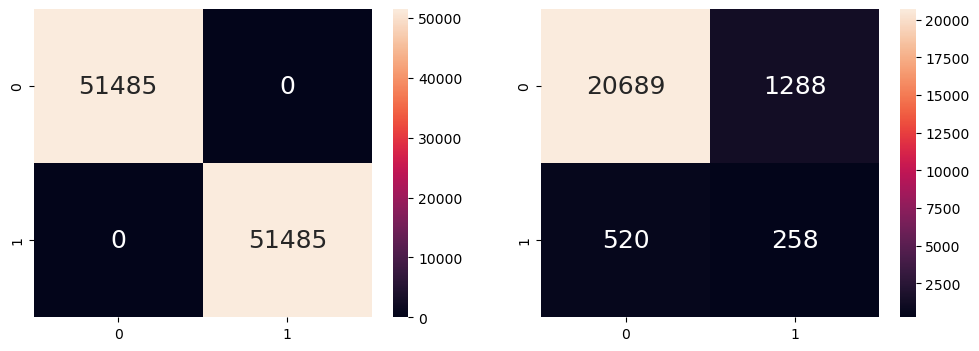

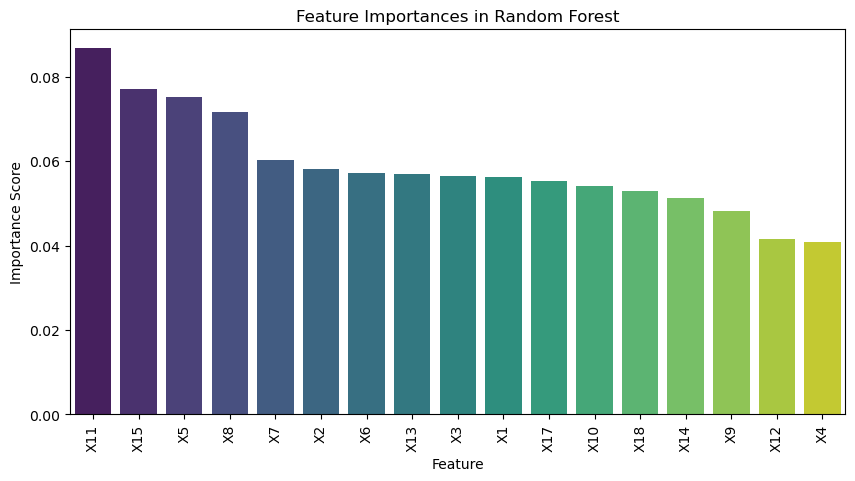

In [39]:
# Predict labels for train set
y_train_pred = model_grid.predict(X_train_resampled)

# Predict labels for test set
y_test_pred = model_grid.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_resampled, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label="alive")
recall = recall_score(y_test, y_test_pred, pos_label="alive")

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred, labels=["alive", "failed"]).ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Plot Feature Importances
feature_importances = model_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_resampled.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()

In [69]:
y_probs = model_grid.predict_proba(X_test)[:, 1]

In [64]:
new_threshold = 0.7
y_pred_adjusted = (y_probs > new_threshold).astype(int)

In [70]:
from sklearn.metrics import classification_report
y_test_bin = (y_test == "failed").astype(int)  # Converts "failed" to 1, "alive" to 0
print(np.unique(y_pred_adjusted))  # Should only contain 0 and 1
print(classification_report(y_test_bin, y_pred_adjusted))

from sklearn.metrics import roc_curve
import numpy as np

fpr, tpr, thresholds = roc_curve(y_test_bin, y_probs)

[0 1]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     21977
           1       0.19      0.38      0.25       778

    accuracy                           0.92     22755
   macro avg       0.58      0.66      0.61     22755
weighted avg       0.95      0.92      0.94     22755



# Train, Test + Validation Combined - Undersampling

In [41]:
import pandas as pd
from sklearn.utils import resample

# Combine X_train and y_train for downsampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes in the training set
df_majority = train_df[train_df.status_label == "alive"]
df_minority = train_df[train_df.status_label == "failed"]

# Downsample the majority class in the training set
df_majority_downsampled = resample(
    df_majority, 
    replace=False, 
    n_samples=len(df_minority), 
    random_state=99
)

# Combine the downsampled majority class with the minority class
train_balanced = pd.concat([df_majority_downsampled, df_minority])

# Separate features and labels again
X_train_balanced = train_balanced.drop(columns=["status_label"])
y_train_balanced = train_balanced["status_label"]

In [42]:
print("Balanced X_train shape:", X_train_balanced.shape)
print("X_test shape:", X_test.shape)  # Unchanged
print("Balanced y_train shape:", y_train_balanced.shape)
print("y_test shape:", y_test.shape)  # Unchanged

Balanced X_train shape: (8884, 17)
X_test shape: (22755, 17)
Balanced y_train shape: (8884,)
y_test shape: (22755,)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

num_features = X_train.shape[1]
rsf_size = max(1, num_features // 3)

print(rsf_size)

rf_grid = RandomForestClassifier(random_state=99,max_features=rsf_size)
gr_space = {
    'n_estimators': [500]
}

grid = GridSearchCV(rf_grid, gr_space, cv = 3, scoring='accuracy', verbose = 3)
model_grid = grid.fit(X_train_balanced, y_train_balanced)

5
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END ..................n_estimators=500;, score=0.590 total time=   7.9s
[CV 2/3] END ..................n_estimators=500;, score=0.628 total time=   7.6s
[CV 3/3] END ..................n_estimators=500;, score=0.598 total time=   7.8s


Accuracy on train set: 1.0
Accuracy on test set: 0.7014282575258185

Classification Report on test set:
              precision    recall  f1-score   support

       alive       0.99      0.70      0.82     21977
      failed       0.09      0.83      0.16       778

    accuracy                           0.70     22755
   macro avg       0.54      0.76      0.49     22755
weighted avg       0.96      0.70      0.80     22755



<Axes: >

<Axes: >

Precision: 0.9913
Recall: 0.6970
False Positives (FP): 6659
False Negatives (FN): 135


<Figure size 1000x500 with 0 Axes>

<Axes: >

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'X8'),
  Text(1, 0, 'X15'),
  Text(2, 0, 'X6'),
  Text(3, 0, 'X7'),
  Text(4, 0, 'X11'),
  Text(5, 0, 'X3'),
  Text(6, 0, 'X17'),
  Text(7, 0, 'X1'),
  Text(8, 0, 'X13'),
  Text(9, 0, 'X2'),
  Text(10, 0, 'X5'),
  Text(11, 0, 'X14'),
  Text(12, 0, 'X10'),
  Text(13, 0, 'X18'),
  Text(14, 0, 'X12'),
  Text(15, 0, 'X9'),
  Text(16, 0, 'X4')])

Text(0.5, 0, 'Feature')

Text(0, 0.5, 'Importance Score')

Text(0.5, 1.0, 'Feature Importances in Random Forest')

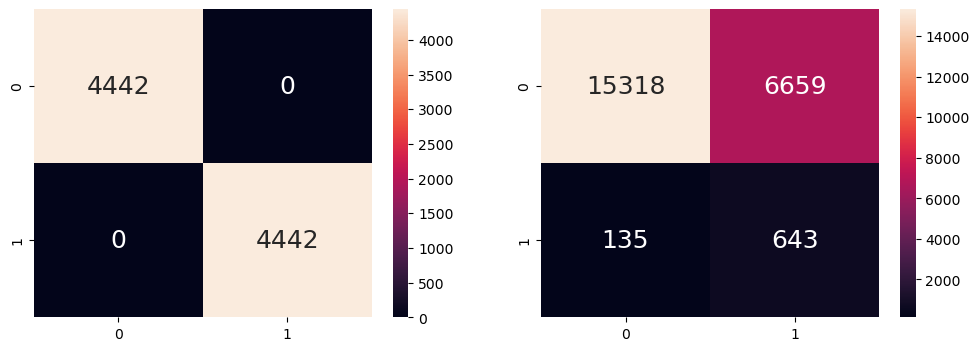

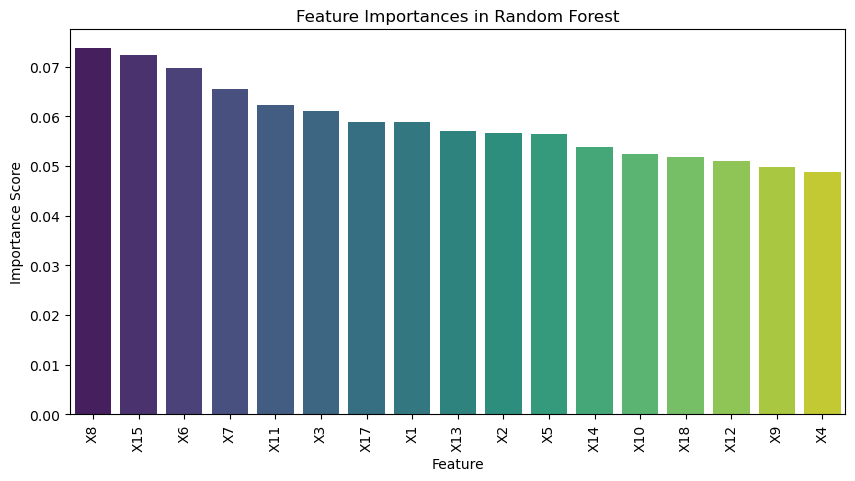

In [44]:
# Predict labels for train set
y_train_pred = model_grid.predict(X_train_balanced)

# Predict labels for test set
y_test_pred = model_grid.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_train_balanced, y_train_pred)
print("Accuracy on train set:", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:", accuracy)

print("\nClassification Report on test set:")
print(classification_report(y_test, y_test_pred))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_train_balanced, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Compute precision and recall
precision = precision_score(y_test, y_test_pred, pos_label="alive")
recall = recall_score(y_test, y_test_pred, pos_label="alive")

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred, labels=["alive", "failed"]).ravel()

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Plot Feature Importances
feature_importances = model_grid.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=np.array(X_train_balanced.columns)[sorted_idx], y=feature_importances[sorted_idx], palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest")
plt.show()